In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    "Москва": [-5, -3, -2, 0, 2, 4, 6],
    "Санкт-Петербург": [-7, -4, -1, 1, 3, 5, 7],
    "Новосибирск": [-15, -12, -10, -8, -6, -4, -2],
    "Екатеринбург": [-10, -8, -6, -4, -2, 0, 2],
    "Казань": [-8, -6, -4, -2, 0, 2, 4]
}

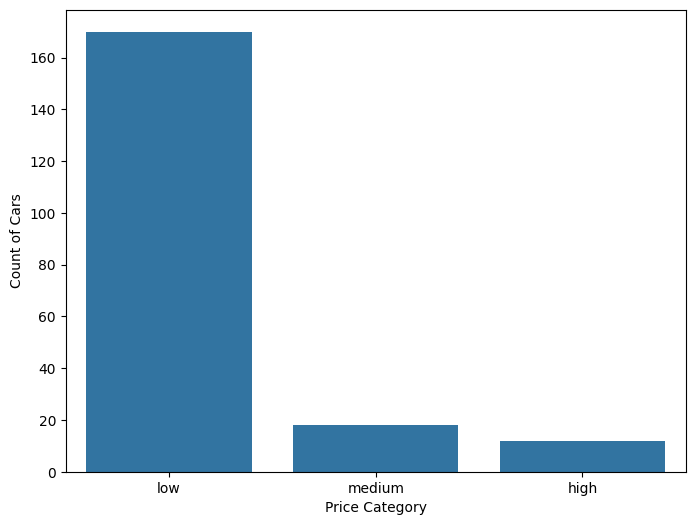

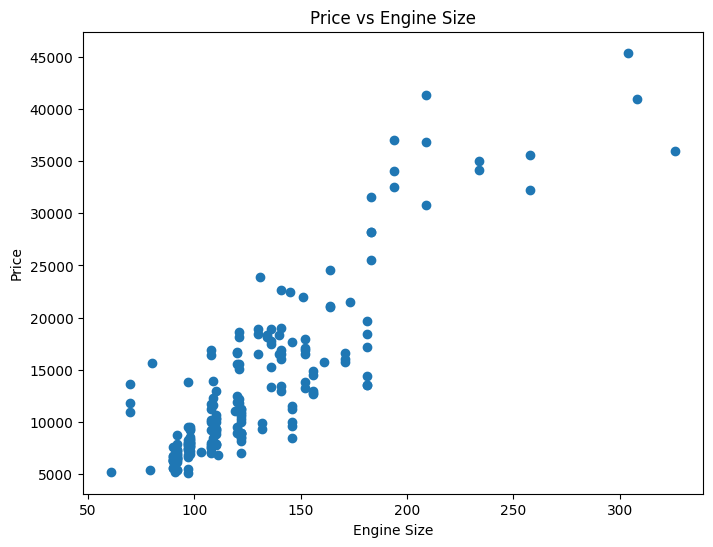

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')


missing_price = data['price'].isnull().sum()
if missing_price > 0:
    data = data.dropna(subset=['price'])


data['price'] = pd.to_numeric(data['price'], errors='coerce')

data['l/100km'] = 235 / data['highway-mpg']

data['length'] /= data['length'].max()
data['width'] /= data['width'].max()
data['height'] /= data['height'].max()

data['price_category'] = pd.cut(data['price'], bins=3, labels=['low', 'medium', 'high'])

plt.figure(figsize=(8, 6))
sns.countplot(x='price_category', data=data)
plt.xlabel('Price Category')
plt.ylabel('Count of Cars')
plt.show()

data = pd.get_dummies(data, columns=['fuel-type'])

plt.figure(figsize=(8, 6))
plt.scatter(data['engine-size'], data['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Price vs Engine Size')
plt.show()

test = data[['drive-wheels', 'body-style', 'price']]
grouped = test.groupby(['drive-wheels', 'body-style']).mean()
